# Exploratory Data Analysis

## Data cleaning, Descriptive statistics, visualization, buisness insight generation.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#datasets loading
customers_df = pd.read_csv('Customers.csv')
print(customers_df.head())
print("\n")

products_df = pd.read_csv('Products.csv')
print(products_df.head())
print("\n")

transactions_df = pd.read_csv('Transactions.csv')
print(transactions_df.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3   

### <u>Data clean and prep</u>

In [8]:
# Checking for null values in each dataset
print("Checking for null values:")
print("Customers:")
print(customers_df.isnull().sum())
print("\nProducts:")
print(products_df.isnull().sum())
print("\nTransactions:")
print(transactions_df.isnull().sum())

Checking for null values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
# Checking for duplicate entries
print("\nChecking for duplicates:")
print("Customers Duplicates:", customers_df.duplicated().sum())
print("Products Duplicates:", products_df.duplicated().sum())
print("Transactions Duplicates:", transactions_df.duplicated().sum())


Checking for duplicates:
Customers Duplicates: 0
Products Duplicates: 0
Transactions Duplicates: 0


In [10]:
# Converting date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


### <u>EDA</u>

In [12]:
# Customer Analysis
print("\nCustomer Distribution by Region:")
region_distribution = customers_df['Region'].value_counts()
print(region_distribution)



Customer Distribution by Region:
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


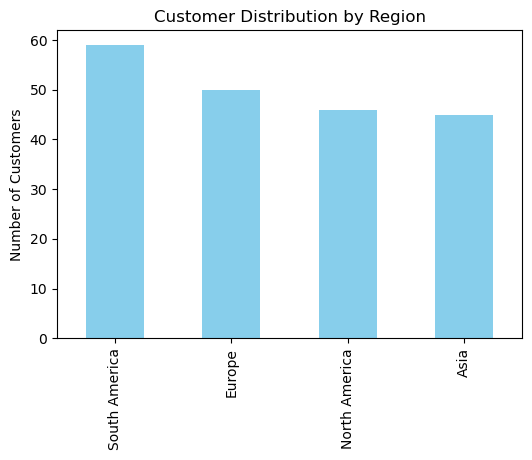

In [13]:
# Plotting Customer Distribution by Region
plt.figure(figsize=(6, 4))
region_distribution.plot(kind='bar', color='skyblue')
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.show()

In [14]:
# Product Analysis
print("\nProduct Distribution by Category:")
product_category_distribution = products_df['Category'].value_counts()
print(product_category_distribution)


Product Distribution by Category:
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


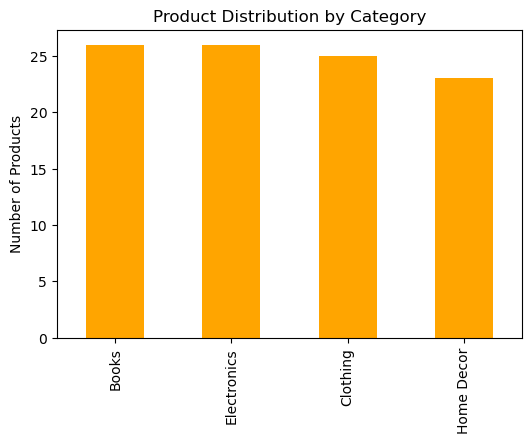

In [15]:
# Plotting Product Distribution by Category
plt.figure(figsize=(6, 4))
product_category_distribution.plot(kind='bar', color='orange')
plt.title("Product Distribution by Category")
plt.ylabel("Number of Products")
plt.show()

In [16]:
# Transaction Analysis
print("\nMonthly Transaction Trend:")
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions_df.groupby('TransactionMonth').size()
print(monthly_transactions)



Monthly Transaction Trend:
TransactionMonth
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, dtype: int64


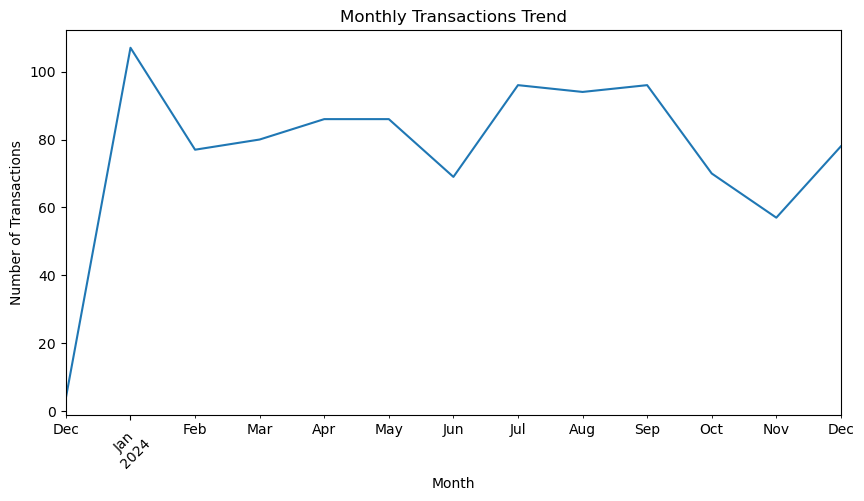

In [17]:
# Plotting Monthly Transaction Trend
plt.figure(figsize=(10, 5))
monthly_transactions.plot()
plt.title("Monthly Transactions Trend")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Analyzing Top Customers by Spending
print("\nTop 5 Customers by Total Spending:")
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(top_customers)


Top 5 Customers by Total Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [19]:
# Analyzing Top Products by Quantity Sold
print("\nTop 5 Products by Quantity Sold:")
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_products)



Top 5 Products by Quantity Sold:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


In [25]:
# Merging transactions and product details for category-level analysis
transactions_with_products = transactions_df.merge(products_df, on='ProductID')
category_sales = transactions_with_products.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

print("\nSales by Product Category:")
print(category_sales)


Sales by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


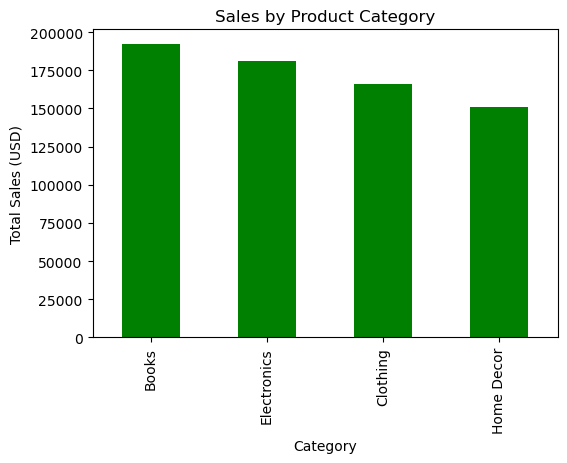

In [26]:
# Plotting Sales by Product Category
plt.figure(figsize=(6, 4))
category_sales.plot(kind='bar', color='green')
plt.title("Sales by Product Category")
plt.ylabel("Total Sales (USD)")
plt.show()


### <u>Descriptive Statistics - Summary statistics for each .csv file</u>


#### Summ stats for customer.csv

In [50]:
# Frequency Counts for Regions
print("\nCustomers by Region:")
print(customers_df['Region'].value_counts())

# Extracting Year from SignupDate
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year

# Sign-Up Year Frequency
print("\nSign-Up Year Distribution:")
print(customers_df['SignupYear'].value_counts())



Customers by Region:
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64

Sign-Up Year Distribution:
2024    79
2022    64
2023    57
Name: SignupYear, dtype: int64


#### Summ stats for Products price

In [51]:
print("\nSummary Statistics for Product Prices:")
print(products_df['Price'].describe())

# Frequency Counts for Product Categories
print("\nProducts by Category:")
print(products_df['Category'].value_counts())



Summary Statistics for Product Prices:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

Products by Category:
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


#### Summ stats for Transactions

In [53]:
print("\nSummary Statistics for Transaction Values:")
print(transactions_df[['TotalValue', 'Quantity']].describe())



Summary Statistics for Transaction Values:
        TotalValue     Quantity
count  1000.000000  1000.000000
mean    689.995560     2.537000
std     493.144478     1.117981
min      16.080000     1.000000
25%     295.295000     2.000000
50%     588.880000     3.000000
75%    1011.660000     4.000000
max    1991.040000     4.000000


### <u>Data Relationships</u>


In [59]:
# Merging datasets
merged_data = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = merged_data.corr()
print(correlation_matrix)


Correlation Matrix:
            Quantity  TotalValue   Price_x  SignupYear   Price_y
Quantity    1.000000    0.609972 -0.009378   -0.005854 -0.009378
TotalValue  0.609972    1.000000  0.722714    0.008564  0.722714
Price_x    -0.009378    0.722714  1.000000    0.003881  1.000000
SignupYear -0.005854    0.008564  0.003881    1.000000  0.003881
Price_y    -0.009378    0.722714  1.000000    0.003881  1.000000


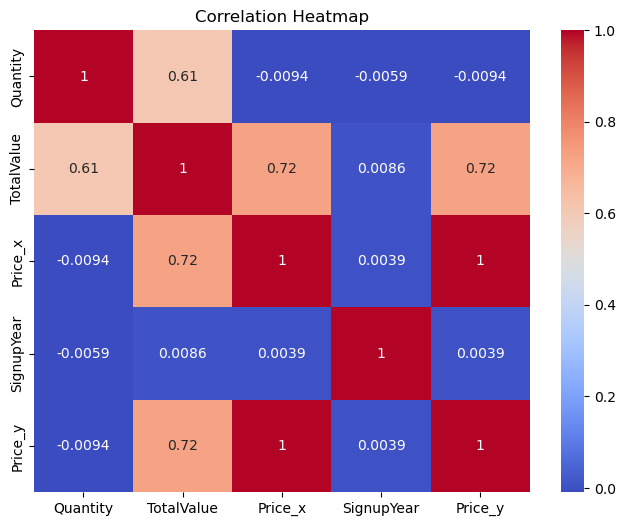

In [60]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [61]:
# Average Spend by Region
average_spend_by_region = merged_data.groupby('Region')['TotalValue'].mean()
print("\nAverage Spend by Region:")
print(average_spend_by_region)

# Total Sales by Product Category
category_sales = merged_data.groupby('Category')['TotalValue'].sum()
print("\nSales by Product Category:")
print(category_sales)


Average Spend by Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64

Sales by Product Category:
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


### <u>Visualization</u>



Top-Selling Categories by Sales:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


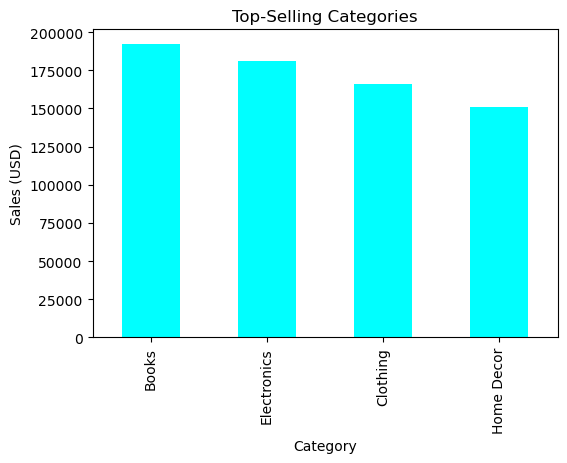

In [37]:
# Sales Analysis: Top-Selling Categories
print("\nTop-Selling Categories by Sales:")
top_selling_categories = category_sales.head(5)
print(top_selling_categories)

plt.figure(figsize=(6, 4))
top_selling_categories.plot(kind='bar', color='cyan')
plt.title("Top-Selling Categories")
plt.ylabel("Sales (USD)")
plt.show()


Average Spend by Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


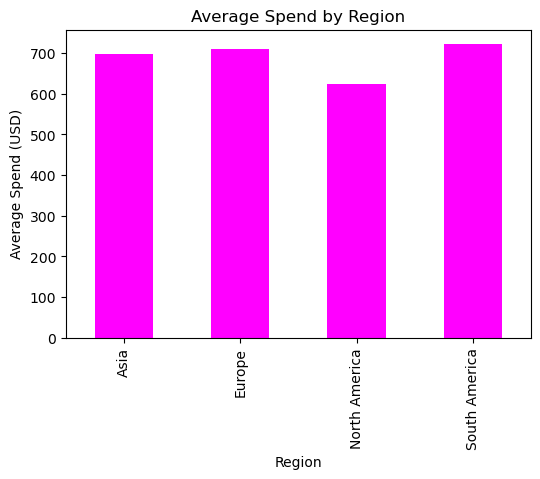

In [38]:
# Customer Behavior: Average Spend by Region
average_spend_by_region = merged_data.groupby('Region')['TotalValue'].mean()
print("\nAverage Spend by Region:")
print(average_spend_by_region)

plt.figure(figsize=(6, 4))
average_spend_by_region.plot(kind='bar', color='magenta')
plt.title("Average Spend by Region")
plt.ylabel("Average Spend (USD)")
plt.show()


Analyzing Price vs Total Sales:


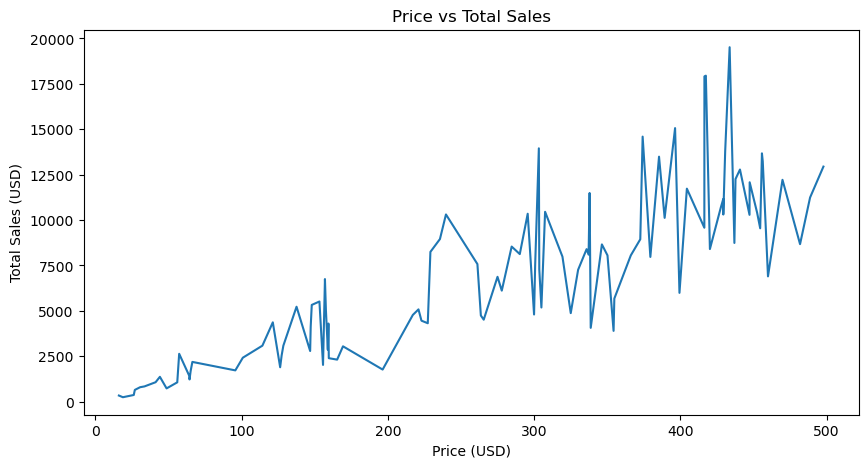

In [68]:
# Product Analysis: Price vs Sales
print("\nAnalyzing Price vs Total Sales:")

# Using 'Price_x' as the price column
price_sales_data = merged_data[['Price_x', 'TotalValue']].rename(columns={'Price_x': 'Price'})

# Checking for missing or invalid values
if price_sales_data.isnull().any().sum() > 0:
    print("Warning: Missing values found in price_sales_data. These will be dropped.")
    price_sales_data = price_sales_data.dropna()

# Grouping and plotting Price vs Total Sales
price_sales_relation = price_sales_data.groupby('Price')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
price_sales_relation.plot()
plt.title("Price vs Total Sales")
plt.xlabel("Price (USD)")
plt.ylabel("Total Sales (USD)")
plt.show()


### <u>Anomalies and Outliers</u>


#### I am Identifying transactions as "high value" if their total amount is greater than what 95% of
#### all other transactions are worth, focusing on the top 5% most expensive ones.

In [69]:
# Identifying Transactions with Extremely High Values
high_value_transactions = transactions_df[transactions_df['TotalValue'] > transactions_df['TotalValue'].quantile(0.95)]
print("\nHigh-Value Transactions:")
print(high_value_transactions)


High-Value Transactions:
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
74         T00007      C0173      P023 2024-05-06 18:05:22         4   
82         T00997      C0164      P023 2024-11-01 23:04:56         4   
118        T00012      C0091      P041 2024-03-29 01:28:17         4   
119        T00034      C0168      P041 2024-01-09 11:00:50         4   
120        T00094      C0012      P041 2024-07-14 19:37:54         4   
125        T00482      C0066      P041 2024-06-04 02:02:24         4   
181        T00020      C0153      P007 2024-07-16 22:33:47         4   
182        T00163      C0101      P007 2024-03-13 22:33:34         4   
262        T00069      C0021      P086 2024-01-13 00:48:20         4   
263        T00193      C0041      P086 2024-06-10 11:46:13         4   
264        T00420      C0057      P086 2024-07-31 21:34:31         4   
265        T00493      C0126      P086 2024-11-28 19:01:58         4   
266        T00587      C0165      P086

### <u>Time Series Analysis</u>



Monthly Sales Trend:
TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


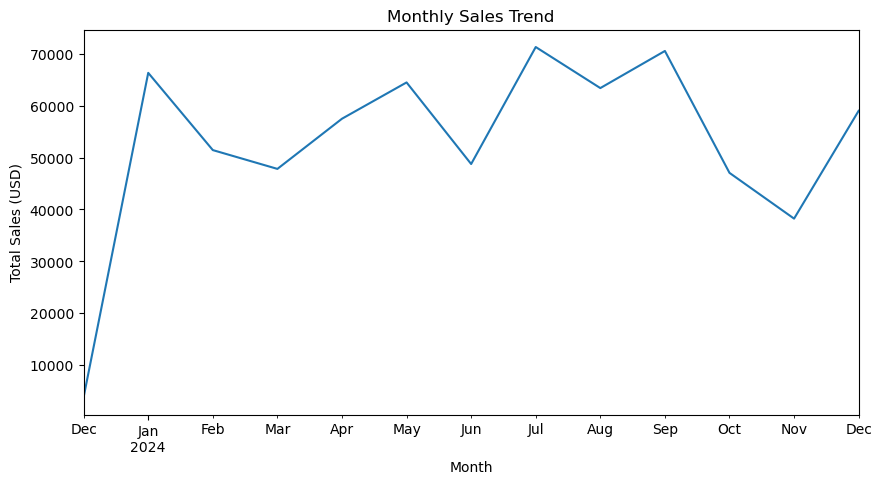

In [44]:
# Analyzing Monthly Sales Trend
monthly_sales = transactions_df.groupby('TransactionMonth')['TotalValue'].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)

plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.show()

### <u>Business Insights</u>


In [46]:
# Customer Segmentation: Average Spend by Region
print("\nCustomer Segmentation Insights:")
print("Regions with Highest Average Spend:")
print(average_spend_by_region.sort_values(ascending=False))

# Product Insights: Best Performing Categories
print("\nProduct Performance Insights:")
print("Best Performing Categories:")
print(category_sales.head(3))

# Sales Performance: High and Low Performing Months
print("\nSales Performance Insights:")
print("Highest Sales Month:", monthly_sales.idxmax(), "with", monthly_sales.max())
print("Lowest Sales Month:", monthly_sales.idxmin(), "with", monthly_sales.min())


Customer Segmentation Insights:
Regions with Highest Average Spend:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64

Product Performance Insights:
Best Performing Categories:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Name: TotalValue, dtype: float64

Sales Performance Insights:
Highest Sales Month: 2024-07 with 71366.39
Lowest Sales Month: 2023-12 with 3769.52
